In [4]:
import pandas as pd
import yfinance as yf

def find_eps(input_file):
    # Read the input CSV file
    df = pd.read_csv(input_file)
    
    # Initialize list to store EPs
    eps = []
    
    # Iterate through each stock symbol
    for symbol in df['Symbol']:
        try:
            # Get historical data for the stock symbol from yfinance
            data = yf.download(symbol, period="1d")
            
            # Calculate gap-up percentage
            gap_up_percentage = ((data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)) * 100
            gap_up_percentage = gap_up_percentage.iloc[-1]
            
            # Check if gap-up percentage is greater than or equal to 10%
            if gap_up_percentage >= 10:
                # Get the date of the gap-up
                gap_up_date = data.index[-1].strftime("%Y-%m-%d")
                
                # Check if earnings announcement date is available
                earnings_announcement_date = "Not available"  # Placeholder value
                # You can implement logic to retrieve earnings announcement date if needed
                
                # Append EP details to the list
                eps.append({
                    'Stocks': symbol,
                    'Gap-up percentage': gap_up_percentage,
                    'Gap-up date': gap_up_date,
                    'Earnings Announcement Date': earnings_announcement_date
                })
        except Exception as e:
            print(f"Error processing {symbol}: {e}")
    
    # Create DataFrame from EPs list
    eps_df = pd.DataFrame(eps)
    
    return eps_df

# Example usage:
input_file = "../data/N1/ind_niftynext50list.csv"  # Replace with your actual input file name
ep_results = find_eps(input_file)
print(ep_results)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Empty DataFrame
Columns: []
Index: []


In [13]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Read symbols from CSV file
data = pd.read_csv('../data/N1/ind_niftynext50list.csv')
# Replace with your actual input file name

symbols = data['Symbol'].tolist()

# Function to check for events
def check_events(symbol, date):
    stock = yf.Ticker(symbol)
    
    # Check for news on the given date
    news = stock.history(start=date, end=date)
    if len(news) > 0:
        event = 'News'
    else:
        event = None
    
    # Check for earnings announcements within the week
    earnings = stock.earnings
    if not earnings.empty:
        earnings_dates = earnings.index
        for earnings_date in earnings_dates:
            if date <= earnings_date <= date + timedelta(days=7):
                event = 'Earnings Announcement'
                break
    
    return event

# Analyze historical data for gap-up events
gap_up_events = []
for symbol in symbols:
    try:
        stock_data = yf.download(symbol, start='2023-01-01', end='2024-03-31')
        stock_data['Prev Close'] = stock_data['Close'].shift(1)
        stock_data['Gap'] = (stock_data['Open'] - stock_data['Prev Close']) / stock_data['Prev Close'] * 100
        gap_ups = stock_data[stock_data['Gap'] >= 10]
        
        for index, row in gap_ups.iterrows():
            event = check_events(symbol, index.date())
            gap_up_events.append({'Stock': symbol, 'Date of Gap Up': index.date(), 'Event': event})
    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# Convert to DataFrame and save to CSV
gap_up_events_df = pd.DataFrame(gap_up_events)
gap_up_events_df.to_csv('gap_up_events.csv', index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ADANIENSOL.NS: No price data found, symbol may be delisted (1d 2023-12-04 -> 2023-12-04)


Error processing ADANIENSOL.NS: Have not implemented fetching 'earnings' from Yahoo API


[*********************100%%**********************]  1 of 1 completed
ADANIGREEN.NS: No price data found, symbol may be delisted (1d 2023-12-04 -> 2023-12-04)


Error processing ADANIGREEN.NS: Have not implemented fetching 'earnings' from Yahoo API


[*********************100%%**********************]  1 of 1 completed
ADANIPOWER.NS: No price data found, symbol may be delisted (1d 2023-12-04 -> 2023-12-04)


Error processing ADANIPOWER.NS: Have not implemented fetching 'earnings' from Yahoo API


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Error processing IRFC.NS: Have not implemented fetching 'earnings' from Yahoo API


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Error processing VBL.NS: Have not implemented fetching 'earnings' from Yahoo API


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


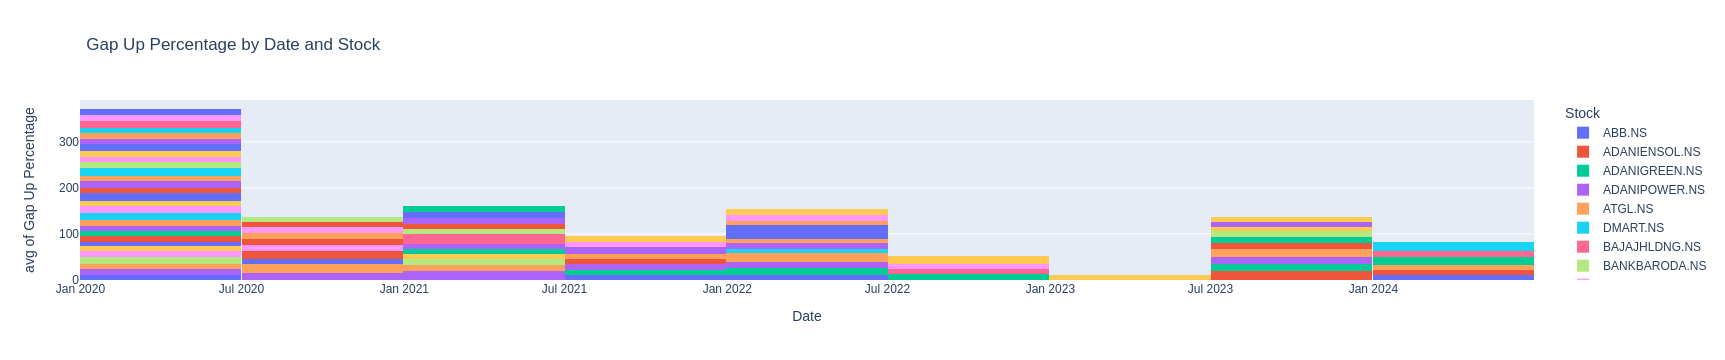

In [24]:

import pandas as pd
import plotly.express as px

# Read the CSV file
data = pd.read_csv('./gap_up_results.csv')

# Convert 'Date of gap up' column to datetime
data['Date of gap up'] = pd.to_datetime(data['Date of gap up'])

# Plot histogram
fig = px.histogram(data, x='Date of gap up', y='Gap up percentage', color='Stock',
                   title='Gap Up Percentage by Date and Stock', 
                   labels={'Date of gap up': 'Date', 'Gap up percentage': 'Gap Up Percentage'},
                   nbins=10, histfunc='avg')

# Show the plot
fig.show()



In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Read the CSV file
# data = pd.read_csv('./gap_up_results.csv')

# # Convert 'Date of gap up' column to datetime
# data['Date of gap up'] = pd.to_datetime(data['Date of gap up'])

# # Group data by stock
# grouped_data = data.groupby('Stock')

# # Plot histograms for each stock
# fig, axs = plt.subplots(len(grouped_data), figsize=(10, 6 * len(grouped_data)))

# for i, (stock, stock_data) in enumerate(grouped_data):
#     axs[i].hist(stock_data['Date of gap up'], weights=stock_data['Gap up percentage'], bins=10, alpha=0.7)
#     axs[i].set_title(f'{stock} Gap Up Percentage by Date')
#     axs[i].set_xlabel('Date')
#     axs[i].set_ylabel('Gap Up Percentage')
#     axs[i].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()
